Test ziva

In [1]:
import run
import numpy as np
import pandas as pd
from myplot import myscatter

In [13]:
N = 12

In [14]:
count = np.array(pd.read_csv("/Users/zixiangluo/Desktop/DR/Data/data"+str(N)+"/data"+str(N)+".csv",index_col=0, sep = "\t"))

In [15]:
count.shape

(704, 38616)

In [16]:
count = count[:, :8000]

In [17]:
idents = np.array(pd.read_csv("/Users/zixiangluo/Desktop/DR/Data/data"+str(N)+"/group"+str(N)+".csv",index_col=0,sep = "\t")).reshape(-1,)

In [18]:
model = run.train(np.float32(count), f = "mm", epochs=200, log = False, batch_size = 50)

Epoch 10  rec_loss:  346.68668  kl_loss:  9.590466  rank_loss:  2956.197
Epoch 20  rec_loss:  337.4646  kl_loss:  6.0271893  rank_loss:  3113.225
Epoch 30  rec_loss:  328.27106  kl_loss:  4.8518395  rank_loss:  3225.475
Epoch 40  rec_loss:  291.6648  kl_loss:  4.797943  rank_loss:  3167.292
Epoch 50  rec_loss:  278.01312  kl_loss:  5.01948  rank_loss:  3201.9526
Epoch 60  rec_loss:  290.0929  kl_loss:  4.7809553  rank_loss:  3292.3108
Epoch 70  rec_loss:  284.0405  kl_loss:  4.529321  rank_loss:  3145.6387
Epoch 80  rec_loss:  279.6681  kl_loss:  4.751304  rank_loss:  3167.0393
Epoch 90  rec_loss:  301.3111  kl_loss:  4.4024262  rank_loss:  3190.9336
Epoch 100  rec_loss:  286.1864  kl_loss:  4.8808026  rank_loss:  3331.8354
Epoch 110  rec_loss:  267.33432  kl_loss:  5.1261797  rank_loss:  3491.188
Epoch 120  rec_loss:  263.3927  kl_loss:  4.5683346  rank_loss:  3355.268
Epoch 130  rec_loss:  264.56244  kl_loss:  4.504243  rank_loss:  3302.6396
Epoch 140  rec_loss:  261.52893  kl_loss: 

In [19]:
expr_in = count
expr_in[expr_in < 0] = 0.0
for i in range(expr_in.shape[0]):
    expr_in[i, :] = expr_in[i, :] / np.max(expr_in[i, :])

In [20]:
Y = np.array(model.encode(expr_in))[0]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



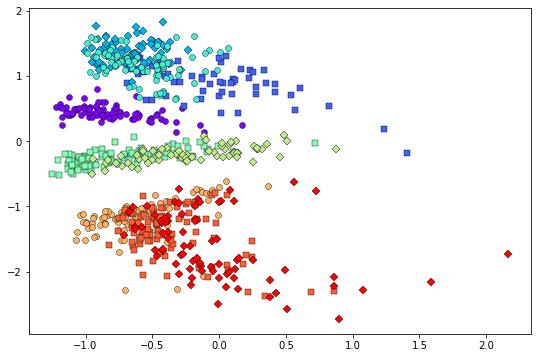

In [21]:
myscatter(np.array(Y),idents)

In [22]:
Zdf = pd.DataFrame(Y)
Zdf.to_csv("/Users/zixiangluo/Desktop/DR/Data/data"+str(N)+"/ziva_mm"+str(N)+".csv",sep = "\t")